# DeePTB Tutorial 3: Training  deeptb-sk model for Silicon  [v2.2]

<div style="color:black; background-color:#FFF3E9; border: 1px solid #FFE0C3; border-radius: 10px; margin-bottom:1rem">
    <p style="margin:1rem; padding-left: 1rem; line-height: 2.5;">
        Author: <a style="font-weight:normal" href="mailto:guqq@ustc.edu.cn">Gu, Qiangqiang 顾强强 📨 </a></b></i><br/>
        Date: 2025-04-04<br/>
        Protocol：<a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License.</a></i><br/>
        Quick Start：Click the <span style="background-color:rgb(85, 91, 228); color:white; padding: 3px; border-radius: 5px;box-shadow: 2px 2px 3px rgba(0, 0, 0, 0.3); font-size:0.75rem;">Start Connection</span> button，then wait a moment to begin.
    </p>
</div>

## Introduction
**DeePTB** is a method that uses deep learning to accelerate first-principles electronic structure simulations.

### Version Features
- **v1**: Constructed tight-binding (TB) models with first-principles accuracy (DeePTB-SK)
- **v2.0-2.1**: Added E3 equivariant networks to represent single-electron operators (Hamiltonian, density matrix, and overlap matrix) (DeePTB-E3)
- **v2.2**: Incorporated built-in SK empirical parameters covering commonly used elements across the periodic table

Through these capabilities, DeePTB provides multiple approaches to accelerate electronic structure simulations of materials.

### Learning Objectives

This tutorial mainly introduces the basic operations of constructing TB models using the DeePTB-SK module.

Reading this tutorial will help yo
u:
1. Familiarize yourself with the training process of DeePTB models
2. Obtain a complete DeePTB model for silicon crystal with high accuracy
3. Familiarize yourself with the usage of DeePTB property calculation module

## Method Practice <a id ='practice'></a>

In [46]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import os
os.chdir("/root/soft/DeePTB/examples/silicon/tutorial_v2.2")

### **1. data preparation** <a id ='dataprepare'></a>
The data used to train the model and plot the verification data is in the `data` folder:

```bash
deeptb/examples/silicon/data/
|-- kpath.0                 # train data of primary cell. (k-path bands)
|-- kpathmd25.0             # train data of 10 MD snapshots at T=25K   (k-path bands)
|-- kpathmd100.0            # train data of 10 MD snapshots at T=100K  (k-path bands)
|-- kpathmd300.0            # train data of 10 MD snapshots at T=300K  (k-path bands)
|-- kpt.0                   # kmesh samples of primary cell  (k-mesh bands)
|-- kpath_spk.0
|-- silicon.vasp            # structure of primary cell
``` 
The meaning of the datasets in this folder is as follows:
- `kpath.0`: Band data of the primitive cell
- `kpathmd25.0`: Band data of 10 MD snapshots at 25K
- `kpathmd100.0`: Band data of 10 MD snapshots at 100K
- `kpathmd300.0`: Band data of 10 MD snapshots at 300K
- `kpt.0`: K-point mesh sampling data of the primitive cell
- `silicon.vasp`: Structure data of the primitive cell
- `kpath_spk.0`: Band data of the primitive cell, spare k points.

Each dataset contains **DeePTB** data files, such as `kpath.0`:
```bash
deeptb/examples/silicon/data/kpath.0/
-- info.json # defining the training objective and edge cutoff of atomic data
-- eigenvalues.npy # numpy array of shape [num_frame, num_kpoint, num_band]
-- kpoints.npy # numpy array of shape [num_kpoint, 3]
-- xdat.traj # ase trajectory file with num_frame
```
Where:
- `info.json`: The filename of this file is fixed and provides information about the dataset loaded in the DeePTB model.
```json
{
    "nframes": 1,
    "natoms": 2,
    "pos_type": "ase",
    "pbc": true,
    "bandinfo": {
        "band_min": 0,
        "band_max": 6,
        "emin": null,
        "emax": null
    }
}
```
> `nframes` marks the number of trajectory snapshots, `natoms` marks the number of atoms in each snapshot, `pos_type` marks the coordinate type, and `pbc` marks whether periodic boundary conditions are applied. The `bandinfo` contains information about the band window, which can be set according to the needs of the user. The band window information can be sorted by band index or divided according to energy size. Note that the value of emin is relative to min(eig[band_min]). Taking min(eig[band_min]) as 0 point.
- `eigenvalues.npy`: This file has a fixed name and contains the original band data, with shape `[n_frames, nkpoints, nbands]`
- `kpoints.npy`: This file has a fixed name and contains the original k-point data, with shape `[nkpoints, 3]`
- `xdat.traj`: This file can have any prefix, but must have the fixed suffix ".traj", and contains trajectory structure data that can be read using ase.
> In addition to providing ase trajectory data with the `.traj` suffix, you can also choose to provide three text files: `positions.dat`, `cell.dat`, and `atomic_numbers.dat` to load the trajectory. The coordinate type provided by the user is specified in `info.json`: it can be fractional coordinates `frac`, actual coordinates `cart`, or ase trajectory file `ase`.




### **2. Model Training ** <a id ='train'></a>
#### **2.1 Extract Initial Experience sktb Model**
Extract the initial experience parameters from the built-in experience parameters. Here is the initial experience parameter model for Si. For details, please refer to the tutorial-1.

Prepare an input file `sk_in.json` for parameter extraction, as follows:
```json
{
    "common_options": {
        "basis": {
            "Si": ["3s","3p","d*"]
        }
    }
}
```
note: the basis can also be ['s','p','d'].

First, run the command to generate an initial sk model:
```bash
dptb esk sk_in.json -m poly4
```
After running, you can see a sktb.json model file.

In [47]:
!dptb esk sk_in.json -m poly4 

TBPLaS is not installed. Thus the TBPLaS is not available, Please install it first.
 
 
#################################################################################
#                                                                               #
#                                                                               #
#      ██████████                     ███████████  ███████████ ███████████      #
#     ░░███░░░░███                   ░░███░░░░░███░█░░░███░░░█░░███░░░░░███     #
#      ░███   ░░███  ██████   ██████  ░███    ░███░   ░███  ░  ░███    ░███     #
#      ░███    ░███ ███░░███ ███░░███ ░██████████     ░███     ░██████████      #
#      ░███    ░███░███████ ░███████  ░███░░░░░░      ░███     ░███░░░░░███     #
#      ░███    ███ ░███░░░  ░███░░░   ░███            ░███     ░███    ░███     #
#      ██████████  ░░██████ ░░██████  █████           █████    ███████████      #
#     ░░░░░░░░░░    ░░░░░░   ░░░░░░  ░░░░░           ░░░░░    ░░░░░░░░░░░       #
#         

We can compare the band structure of the initial model with DFT results. 

TBPLaS is not installed. Thus the TBPLaS is not available, Please install it first.
 
 
#################################################################################
#                                                                               #
#                                                                               #
#      ██████████                     ███████████  ███████████ ███████████      #
#     ░░███░░░░███                   ░░███░░░░░███░█░░░███░░░█░░███░░░░░███     #
#      ░███   ░░███  ██████   ██████  ░███    ░███░   ░███  ░  ░███    ░███     #
#      ░███    ░███ ███░░███ ███░░███ ░██████████     ░███     ░██████████      #
#      ░███    ░███░███████ ░███████  ░███░░░░░░      ░███     ░███░░░░░███     #
#      ░███    ███ ░███░░░  ░███░░░   ░███            ░███     ░███    ░███     #
#      ██████████  ░░██████ ░░██████  █████           █████    ███████████      #
#     ░░░░░░░░░░    ░░░░░░   ░░░░░░  ░░░░░           ░░░░░    ░░░░░░░░░░░       #
#         

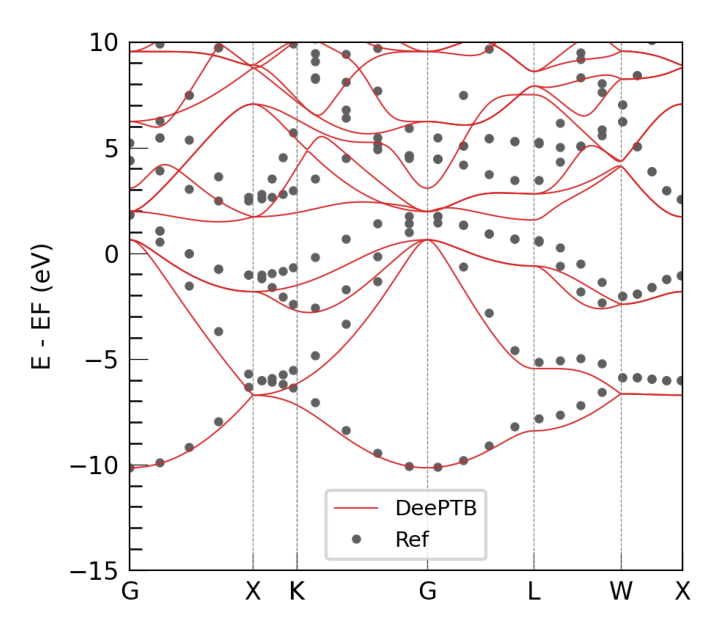

In [48]:
!dptb run band.json -i sktb.json -o  band -stu ../data/silicon.vasp
# display the band plot:
image_path = f'./band/results/band.png'
img = mpimg.imread(image_path)
plt.figure(figsize=(10, 8))
plt.imshow(img)
plt.axis('off')
plt.show()

#### **2.2 Generate Training Input Control Parameters**
The developers have provided a template for generating training sk models to facilitate user use. The command to obtain the template is as follows:
```bash
dptb config ./ -tr -sk -m ./sktb.json 
```
**Note**: Here I loaded the sktb.json model file generated in the previous step, so some parameters will be set according to the model.
After running the above command, you will get `./input_templete.json`.

Note: the template cannot be used directly and needs to be modified according to the situation. For example, the parameters in `train_options` and `data_options`. 
You should also ensure that the paths and options are correctly set for your specific use case.

In [49]:
!dptb config ./ -tr -sk -m ./sktb.json 

TBPLaS is not installed. Thus the TBPLaS is not available, Please install it first.
 
 
#################################################################################
#                                                                               #
#                                                                               #
#      ██████████                     ███████████  ███████████ ███████████      #
#     ░░███░░░░███                   ░░███░░░░░███░█░░░███░░░█░░███░░░░░███     #
#      ░███   ░░███  ██████   ██████  ░███    ░███░   ░███  ░  ░███    ░███     #
#      ░███    ░███ ███░░███ ███░░███ ░██████████     ░███     ░██████████      #
#      ░███    ░███░███████ ░███████  ░███░░░░░░      ░███     ░███░░░░░███     #
#      ░███    ███ ░███░░░  ░███░░░   ░███            ░███     ░███    ░███     #
#      ██████████  ░░██████ ░░██████  █████           █████    ███████████      #
#     ░░░░░░░░░░    ░░░░░░   ░░░░░░  ░░░░░           ░░░░░    ░░░░░░░░░░░       #
#         

Donot forget to modify the `data_options` and `train_options` parameters in the input file. 

We suggest copying the template and modifying the copied input parameter file. For example, we have already prepared the first training parameter file `input_1.json` in the case folder, which can be used for training the model for perfect crystal Si.

#### **2.3.1 Training the DeePTB-SK model for perfect lattice**

In [51]:
# v100 1m45s
!dptb train input_1.json -i sktb.json -o nnsk1

TBPLaS is not installed. Thus the TBPLaS is not available, Please install it first.
 
 
#################################################################################
#                                                                               #
#                                                                               #
#      ██████████                     ███████████  ███████████ ███████████      #
#     ░░███░░░░███                   ░░███░░░░░███░█░░░███░░░█░░███░░░░░███     #
#      ░███   ░░███  ██████   ██████  ░███    ░███░   ░███  ░  ░███    ░███     #
#      ░███    ░███ ███░░███ ███░░███ ░██████████     ░███     ░██████████      #
#      ░███    ░███░███████ ░███████  ░███░░░░░░      ░███     ░███░░░░░███     #
#      ░███    ███ ░███░░░  ░███░░░   ░███            ░███     ░███    ░███     #
#      ██████████  ░░██████ ░░██████  █████           █████    ███████████      #
#     ░░░░░░░░░░    ░░░░░░   ░░░░░░  ░░░░░           ░░░░░    ░░░░░░░░░░░       #
#         

TBPLaS is not installed. Thus the TBPLaS is not available, Please install it first.
 
 
#################################################################################
#                                                                               #
#                                                                               #
#      ██████████                     ███████████  ███████████ ███████████      #
#     ░░███░░░░███                   ░░███░░░░░███░█░░░███░░░█░░███░░░░░███     #
#      ░███   ░░███  ██████   ██████  ░███    ░███░   ░███  ░  ░███    ░███     #
#      ░███    ░███ ███░░███ ███░░███ ░██████████     ░███     ░██████████      #
#      ░███    ░███░███████ ░███████  ░███░░░░░░      ░███     ░███░░░░░███     #
#      ░███    ███ ░███░░░  ░███░░░   ░███            ░███     ░███    ░███     #
#      ██████████  ░░██████ ░░██████  █████           █████    ███████████      #
#     ░░░░░░░░░░    ░░░░░░   ░░░░░░  ░░░░░           ░░░░░    ░░░░░░░░░░░       #
#         

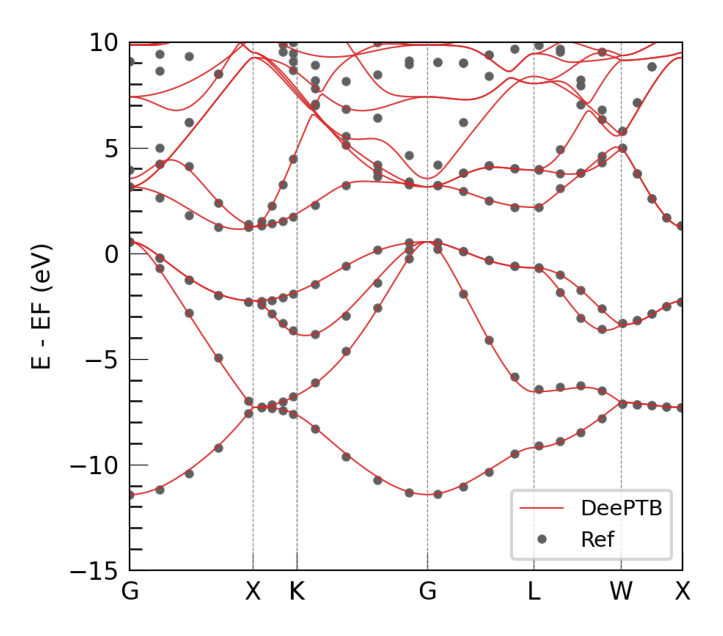

In [53]:
# !dptb run band.json -i ./nnsk1/checkpoint/nnsk.best.pth -o band1 -stu ../data/silicon.vasp
!dptb run band.json -i ./ref_ckpt/nnsk_tr1.pth  -o band1 -stu ../data/silicon.vasp

# display the band plot:
image_path = f'./band1/results/band.png'
img = mpimg.imread(image_path)
plt.figure(figsize=(10, 8))
plt.imshow(img)
plt.axis('off')
plt.show()

#### **2.3 Training on MD data (bond length dependence)**
In **DeePTB**, the SK integral based on physical images is parameterized by various bond length-related functions. For example, in the above forms of `powerlaw` and `poly4pow`, the bond integral is an explicit function of bond length. This provides good transferability for the `NNSK` model, allowing it to fully simulate the changes in electronic structure caused by structural distortion.

To further improve the transferability of such models, we strongly recommend training bond length-dependent parameters. This type of training can be easily obtained from MD trajectory datasets. Additionally, it is important to ensure that the training dataset is diverse and representative of the various bond lengths encountered in practical scenarios.

We provide datasets for 10 MD frames at 25K, 100K, and 300K. Users can easily obtain bond length-dependent `NNSK` models by modifying the `data_options/train/prefix` in the input configuration to `kpathmd25/kpathmd100/kpathmd300`, and using the `-i` option to initialize the checkpoint for training.

During the training on MD trajectory datasets, in addition to providing the `train` dataset of MD trajectory data, it is also recommended to provide the single structure dataset used in the previous training as a `reference` dataset. This can help stabilize the training process for the MD trajectory. When using the `reference` dataset, it is necessary to specify the `ref_batch_size` in `train_option` and the corresponding loss calculation method for the `reference` dataset in `train_loss`. The rest of the input content remains unchanged. For specific input details, please refer to `input_2.json`.

After training the model, users can use the same band plotting API as mentioned earlier to visualize the band structure. The plotting parameters are located in `./run/band_2.json`.

We now adjust the training input parameters. For details, please refer to `input_2.json`. We change the prefix of the dataset to `kpathmd100.0`. We can also set other parameters such as learning rate and number of iterations. For specific parameter settings, please refer to `input_2.json`.

main changes in  data_options：
```json
{
    "data_options": {
        "train": {
            "root": "./data/",
            "prefix": "kpathmd100",
            "get_eigenvalues": true,
            "get_Hamiltonian": false
        },
        "reference": {
            "root": "./data/",
            "prefix": "kpath_spk",
            "type": "DefaultDataset",
            "get_eigenvalues": true,
            "get_Hamiltonian": false
        }
    }
}
```
and loss_options

```json
{
        "loss_options": {
            "train": {
                "method": "eigvals",
                "diff_on": false,
                "eout_weight": 0.001,
                "diff_weight": 0.01
            },
            "reference": {
                "method": "eigvals",
                "diff_on": false,
                "eout_weight": 0.001,
                "diff_weight": 0.01
            }
        },
}
```


Here, just as a demonstration, we also reduced the number of training iterations.

In [54]:
# v100, 4m4s 
# !dptb train input_2.json -i nnsk1/checkpoint/nnsk.best.pth -o nnskmd100
!dptb train input_2.json -i ./ref_ckpt/nnsk_tr1.pth  -o nnskmd100

TBPLaS is not installed. Thus the TBPLaS is not available, Please install it first.
 
 
#################################################################################
#                                                                               #
#                                                                               #
#      ██████████                     ███████████  ███████████ ███████████      #
#     ░░███░░░░███                   ░░███░░░░░███░█░░░███░░░█░░███░░░░░███     #
#      ░███   ░░███  ██████   ██████  ░███    ░███░   ░███  ░  ░███    ░███     #
#      ░███    ░███ ███░░███ ███░░███ ░██████████     ░███     ░██████████      #
#      ░███    ░███░███████ ░███████  ░███░░░░░░      ░███     ░███░░░░░███     #
#      ░███    ███ ░███░░░  ░███░░░   ░███            ░███     ░███    ░███     #
#      ██████████  ░░██████ ░░██████  █████           █████    ███████████      #
#     ░░░░░░░░░░    ░░░░░░   ░░░░░░  ░░░░░           ░░░░░    ░░░░░░░░░░░       #
#         

TBPLaS is not installed. Thus the TBPLaS is not available, Please install it first.
 
 
#################################################################################
#                                                                               #
#                                                                               #
#      ██████████                     ███████████  ███████████ ███████████      #
#     ░░███░░░░███                   ░░███░░░░░███░█░░░███░░░█░░███░░░░░███     #
#      ░███   ░░███  ██████   ██████  ░███    ░███░   ░███  ░  ░███    ░███     #
#      ░███    ░███ ███░░███ ███░░███ ░██████████     ░███     ░██████████      #
#      ░███    ░███░███████ ░███████  ░███░░░░░░      ░███     ░███░░░░░███     #
#      ░███    ███ ░███░░░  ░███░░░   ░███            ░███     ░███    ░███     #
#      ██████████  ░░██████ ░░██████  █████           █████    ███████████      #
#     ░░░░░░░░░░    ░░░░░░   ░░░░░░  ░░░░░           ░░░░░    ░░░░░░░░░░░       #
#         

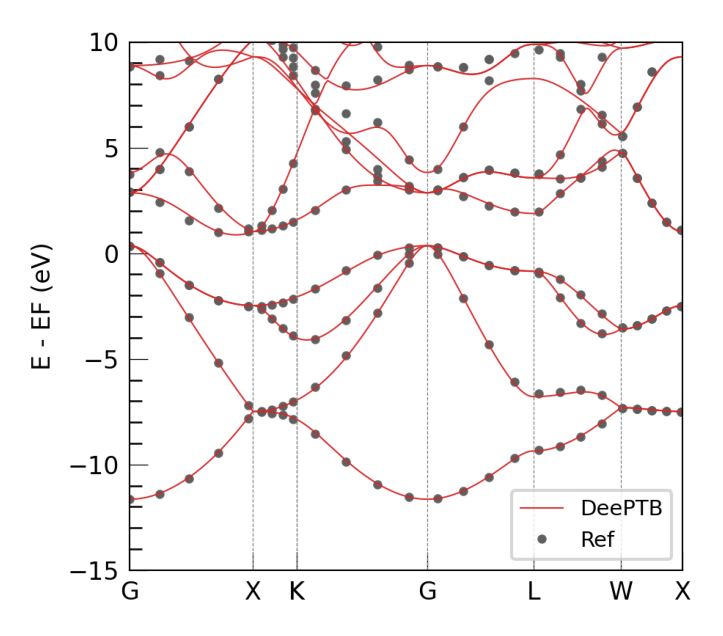

In [55]:
# !dptb run band.json -i ./nnskmd100/checkpoint/nnsk.best.pth -o band2 -stu ../data/silicon.vasp
!dptb run band.json -i ./ref_ckpt/nnsk.md100.pth -o band2 -stu ../data/silicon.vasp

# display the band plot:
image_path = f'./band2/results/band.png'
img = mpimg.imread(image_path)
plt.figure(figsize=(10, 8))
plt.imshow(img)
plt.axis('off')
plt.show()

TBPLaS is not installed. Thus the TBPLaS is not available, Please install it first.
 
 
#################################################################################
#                                                                               #
#                                                                               #
#      ██████████                     ███████████  ███████████ ███████████      #
#     ░░███░░░░███                   ░░███░░░░░███░█░░░███░░░█░░███░░░░░███     #
#      ░███   ░░███  ██████   ██████  ░███    ░███░   ░███  ░  ░███    ░███     #
#      ░███    ░███ ███░░███ ███░░███ ░██████████     ░███     ░██████████      #
#      ░███    ░███░███████ ░███████  ░███░░░░░░      ░███     ░███░░░░░███     #
#      ░███    ███ ░███░░░  ░███░░░   ░███            ░███     ░███    ░███     #
#      ██████████  ░░██████ ░░██████  █████           █████    ███████████      #
#     ░░░░░░░░░░    ░░░░░░   ░░░░░░  ░░░░░           ░░░░░    ░░░░░░░░░░░       #
#         

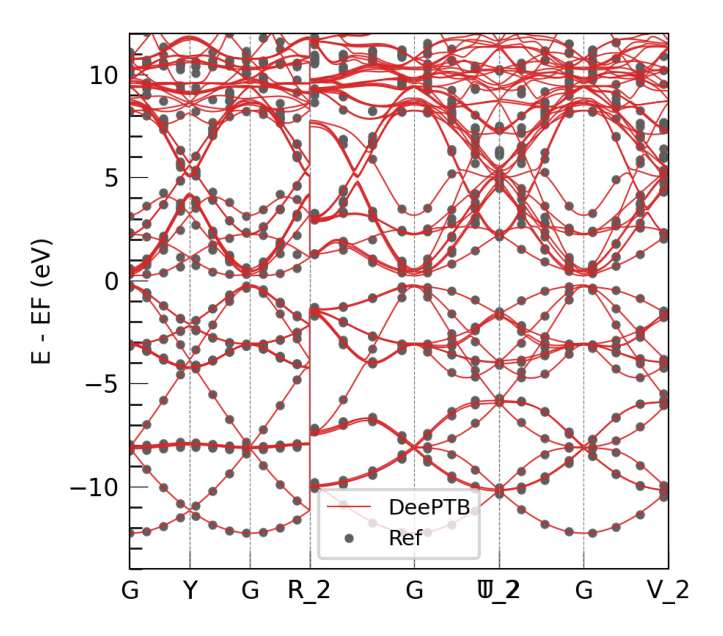

In [56]:
# !dptb run band_2.json -i ./nnskmd100/checkpoint/nnsk.best.pth -stu ./data/kpathmd100.0/struct.vasp -o  band3
!dptb run band_2.json -i ./ref_ckpt/nnsk.md100.pth -stu ../data/kpathmd100.0/struct.vasp -o  band3

# display the band plot:
image_path = f'./band3/results/band.png'
img = mpimg.imread(image_path)
plt.figure(figsize=(10, 8))
plt.imshow(img)
plt.axis('off')
plt.show()

#### **2.4 Training Environment Correction**

The **DeePTB-SK** module provides powerful environment-dependent modeling with symmetry-preserving neural networks. Based on the previously constructed `nnsk` model, we can further enhance the TB model's descriptive ability by adding an environment-dependent component to overcome the accuracy limitations imposed by the two-center approximation. The model that incorporates environment dependence into the `nnsk` model is referred to as the `mix` model, and its expression is as follows:
$$
\begin{equation}
h^{\text{env}}_{ll^\prime{\zeta}} =  h_{ll^\prime{\zeta}}(r_{ij}) \times \left[1+\Phi_{ll^\prime\zeta}^{o_i,o_j}\left(r_{ij},\mathcal{D}^{ij}\right)\right]	
\end{equation}
$$
where $\mathcal{D}^{ij}$ is the environment descriptor defined by the `embedding` keyword, and $\Phi_{ll^\prime\zeta}^{o_i,o_j}$ is the neural network that provides the environment correction prediction value.

To define the `mix` correction model, you need to provide the following keywords in the `model_options` section of the training input file:
- `embedding`: The `method` here specifies the form of the atomic environment used in the `dptb` model. In this example, we use the `se2` form of descriptor similar to that used in **DeePMD**. 
- `prediction`: The `method` specifies the prediction method of the model, which is set to `sktb` here. The `neurons` keyword specifies the size of the prediction network.
- `nnsk`: This section is consistent with the content in the `nnsk` model. The `freeze` option should be set to `true`, indicating that the trained SK parameters of the `nnsk` model are fixed, and only the neural network parameters of the environment-dependent part are trained. This fixing is crucial; otherwise, the initialization of the `mix` model may completely destroy the parameters of the `nnsk` model, leading to non-convergence during training.
  
For example:
```json
    "model_options": {
        "embedding":{
            "method": "se2",
            "rs": 2.5,
            "rc": 5.0,
            "radial_net": {
                "neurons": [10,20,30]
            }
        },
        "prediction":{
            "method": "sktb",
            "neurons": [16,16,16]
        },
        "nnsk": {
            ...
            "freeze": true
            ...
        }
    }
```
The complete input content can be found in `input_3.json`. The environment-dependent `mix` model training requires reading the `nnsk` model. We can run:

In [57]:
# !dptb train input_3.json -i ./nnskmd100/checkpoint/nnsk.ep20.pth -o ./mix
!dptb train input_3.json -i ./ref_ckpt/nnsk.md100.pth -o ./mix

TBPLaS is not installed. Thus the TBPLaS is not available, Please install it first.
 
 
#################################################################################
#                                                                               #
#                                                                               #
#      ██████████                     ███████████  ███████████ ███████████      #
#     ░░███░░░░███                   ░░███░░░░░███░█░░░███░░░█░░███░░░░░███     #
#      ░███   ░░███  ██████   ██████  ░███    ░███░   ░███  ░  ░███    ░███     #
#      ░███    ░███ ███░░███ ███░░███ ░██████████     ░███     ░██████████      #
#      ░███    ░███░███████ ░███████  ░███░░░░░░      ░███     ░███░░░░░███     #
#      ░███    ███ ░███░░░  ░███░░░   ░███            ░███     ░███    ░███     #
#      ██████████  ░░██████ ░░██████  █████           █████    ███████████      #
#     ░░░░░░░░░░    ░░░░░░   ░░░░░░  ░░░░░           ░░░░░    ░░░░░░░░░░░       #
#         

In [58]:
# !dptb run band_2.json -i ./mix/checkpoint/mix.best.pth -stu ./data/kpathmd100.0/struct.vasp -o  band4
!dptb run band_2.json -i ./ref_ckpt/mix.md100.pth -stu ../data/kpathmd100.0/struct.vasp -o  band4

# display the band plot:
image_path = f'./band4/results/band.png'
img = mpimg.imread(image_path)
plt.figure(figsize=(10, 8))
plt.imshow(img)
plt.axis('off')
plt.show()

<div style="color:black; background-color:#FFF3E9; border: 1px solid #FFE0C3; border-radius: 10px; margin-bottom:1rem">
    <p style="margin:1rem; padding-left: 1rem; line-height: 2.5;">
        Author: <a style="font-weight:normal" href="mailto:guqq@ustc.edu.cn">Gu, Qiangqiang : guqq@ustc.edu.cn</a>
    </p>
    <p style="margin:1rem; padding-left: 1rem; line-height: 2.5;">
        Thank you for reading!
    </p>
</div>